<a href="https://colab.research.google.com/github/iampro3/deep-learning/blob/main/geopandas_0720.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도정보 서비스
 - https://datascienceschool.net/03%20machine%20learning/03.04.01%20%EC%A7%80%EB%A6%AC%20%EC%A0%95%EB%B3%B4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%B2%98%EB%A6%AC.html

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

gpd.__version__

'0.13.2'

In [ ]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

<ipython-input-9-6dd2f0759acc>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-9-6dd2f0759acc>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [ ]:
cities.tail()

,name,geometry
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)
242,Hong Kong,POINT (114.18306 22.30693)


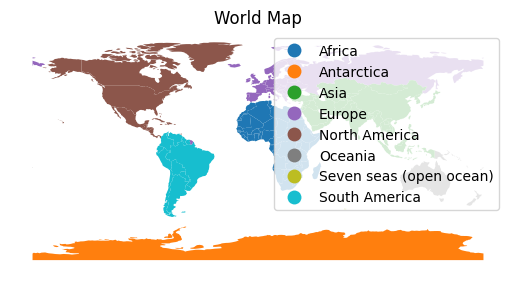

In [ ]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("World Map")
ax.set_axis_off()
plt.show()

In [ ]:
!pip install mapclassify
import mapclassify

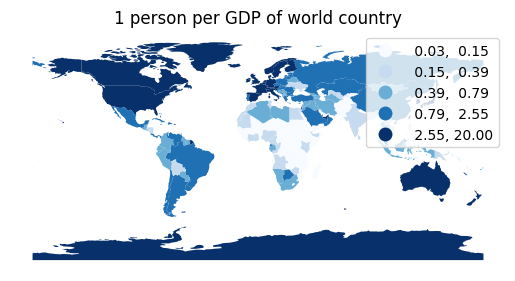

In [ ]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("1 person per GDP of world country")
plt.show()

In [ ]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [ ]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575002 53.470121568406555, 23.80493493011778 53.089731350306074, 23.79919884613338 52.69109935160657, 23.199493849386187 52.48697744405367, 23.508002150168693 52.02364655212473, 23.52707075368437 51.57845408793031, 24.029985792748903 50.70540660257518, 23.92275719574326 50.42488108987874, 23.426508416444392 50.30850576435745, 22.518450148211603 49.47677358661974, 22.776418898212626 49.02739533140962, 22.558137648211755 49.085738023467144, 21.607808058364213 49.47010732685409, 20.887955356538413 49.32877228453583, 20.415839471119853 49.43145335549977, 19.825022820726872 49.21712535256923, 19.320712517990472 49.571574001659194, 18.90957482267632 49.435845852244576, 18.853144158613617 49.49622976337764, 18.392913852622172 49.98862864847075, 17.64944502123899 50.049038397819956, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.719475945714436 50.21574656839354, 16.176253289462267 50.42260732685791, 16.23

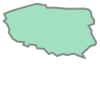

In [ ]:
countries.geometry[113]

# linestring

In [ ]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

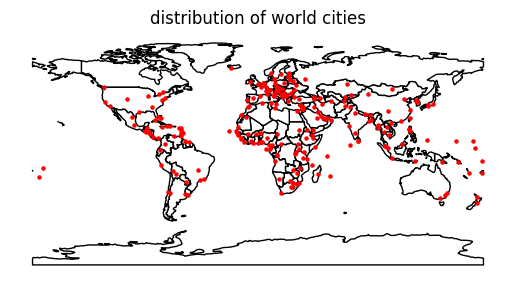

In [ ]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("distribution of world cities")
plt.show()

In [ ]:
korea_border = countries[countries.name == "Korea"].geometry
# 버전 6.x에서는 "South Korea"를 사용해야 함

korea_border.boundary.squeeze()

GeoSeries([], dtype: geometry)

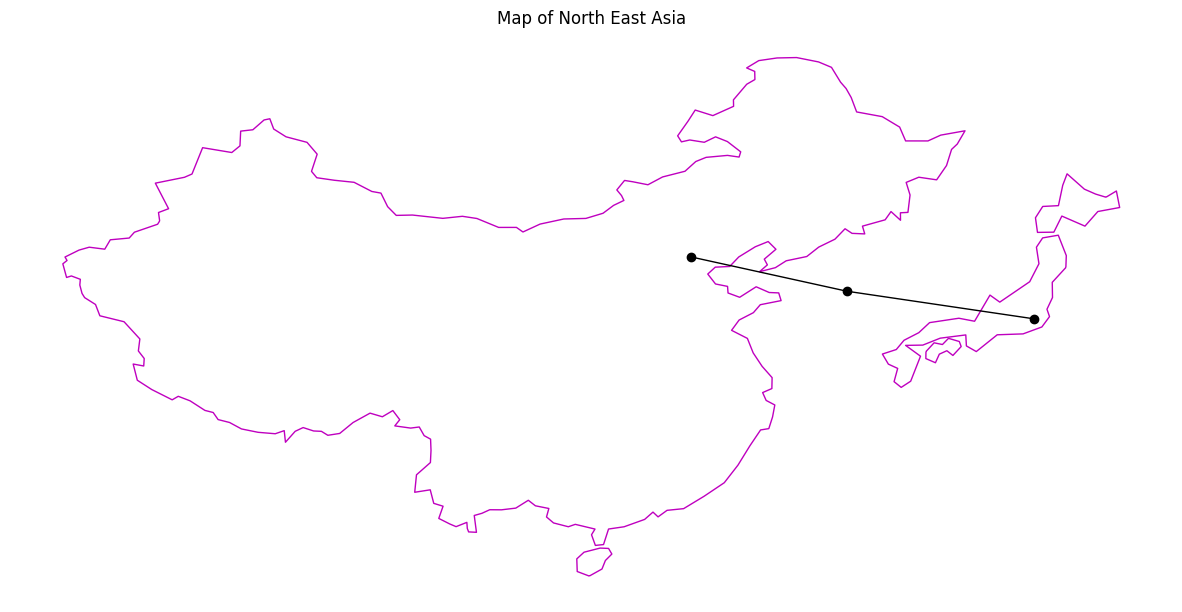

In [ ]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("Map of North East Asia")
ax.set_axis_off()
plt.show()

In [ ]:
korea = countries.loc[countries['name'] == 'Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

In [ ]:
seoul.within(korea)

Series([], Name: geometry, dtype: bool)

In [ ]:
korea.contains(seoul)

Series([], dtype: bool)

In [ ]:
china.intersects(korea)

Series([], Name: geometry, dtype: bool)

In [ ]:
line.crosses(korea)

Series([], Name: geometry, dtype: bool)

In [ ]:
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.155847
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.184621
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.026168
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.024688


In [ ]:
seoul.distance(beijing)

10.857295783020785

#